<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/ce_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## **Caso de Estudio: Clustering en tarjetas de crédito**


**Este caso requiere desarrollar una segmentación de clientes para definir la estrategia de marketing. El
conjunto de datos de muestra resume el comportamiento de uso de aproximadamente $9000$ titulares de tarjetas de crédito activos durante los últimos $6$ meses. El archivo está a nivel de cliente con $18$ variables de comportamiento.**

#**Habilitando las bibliotecas necesarias**

### **Para el tratamiento de los datos**

In [1]:
import pandas as pd
import numpy as np

### **Para el preprocesamiento y modelo**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### **Para Análisis de Componentes Principales**

In [3]:
from sklearn.decomposition import PCA

### **Para gráficos**

In [4]:
import plotly.express as px
import plotly.graph_objects as go

In [5]:
#import matplotlib.pyplot as plt
#%matplotlib inline

# **Extracción de Datos - Creación del DataFrame**

In [6]:
archivo = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/credit_card.csv"

In [7]:
datos = pd.read_csv(archivo)
datos.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


- **CUSTID**: Identificación del titular de la tarjeta de crédito
- **BALANCE**: Monto del saldo que queda en su cuenta para realizar compras
- **BALANCEFREQUENCY**: Frecuencia de actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
- **PURCHASES**: importe de las compras realizadas desde la cuenta
- **ONEOFFPURCHASES**: cantidad máxima de compra realizada en una sola compra
- **INSTALLMENTSPURCHASES**: cantidad de compra en cuotas
- **CASHADVANCE**: pago por adelantado dado por el usuario
- **PURCHASESFREQUENCY**: Con qué frecuencia se realizan Compras (1 = comprado con frecuencia, 0 = comprado con frecuencia)
- **ONEOFFPURCHASESFREQUENCY**: Con qué frecuencia se hacen las compras unicas (1 = comprado con frecuencia, 0 = no se hace con frecuencia)
- **PURCHASESINSTALLMENTSFREQUENCY**: Con qué frecuencia se hacen las compras en cuotas (1 = frecuencia al cabo, 0 = no se hace con frecuencia)
- **CASHADVANCEFREQUENCY**: con qué frecuencia se paga con dinero en efectivo por adelantado
- **CASHADVANCETRX**: número de transacciones realizadas con "dinero en efectivo"
- **PURCHASESTRX**: número de transaccines realizadas
- **CREDITLIMIT**: Límite de tarjeta de crédito
- **PAYMENTS**: Monto del pago realizado por el usuario
- **MINIMUM_PAYMENTS**: Pago mínimo
- **PRCFULLPAYMENT**: Porcentaje del pago total pagado por el usuario
- **TENURE**: Tenencia del servicio de tarjeta de crédito para el usuario

In [8]:
# antiguedad deuda + vencimiento cuotas + debitos directos

# **Duplicando el DataFrame**

In [9]:
df = datos.copy()

In [10]:
df.shape

(8950, 18)

# **Limpieza de los datos**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.0,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.0,1003.20,2136.63,0.00,39.64,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.0,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.0,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.0,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.14,0.20,0.00,0.00,0.00,0.22,1.50


## **Imputacion de nulos**

In [13]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [14]:
# Mode=0 --- Mediana=3 --- Media=100

In [15]:
# Imputar valores medios en missing values

In [16]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True, 'MINIMUM_PAYMENTS')] = df['MINIMUM_PAYMENTS'].median()

In [17]:
df.loc[(df['CREDIT_LIMIT'].isnull()==True, 'CREDIT_LIMIT')] = df['CREDIT_LIMIT'].median()

In [18]:
df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

## **Eliminando variables**

In [19]:
df.drop(columns = ['CUST_ID'], inplace = True)

# **Preprocesamiento de los datos**

In [20]:
# Normalizar base

## **Normalizacion**

In [21]:
scaler = StandardScaler()

In [22]:
df_scaled = scaler.fit_transform(df)

In [23]:
df.shape == df_scaled.shape

True

# **Análisis de Componentes Principales**

In [24]:
pca = PCA(n_components = 3).fit(df_scaled)
pca_values = pca.transform(df_scaled)

In [25]:
pca_values = pd.DataFrame(data = pca_values, columns=['PC1','PC2',"PC3"])

In [26]:
df.shape[0] == pca_values.shape[0]

True

In [27]:
pca_values.shape

(8950, 3)

# **Creación del Modelo**

## **Número de clusters**

In [28]:
n_clusters = 15
elbow = []
columnas = ["cluster_range", "inertia"]

In [31]:
for i in range(1, n_clusters):
    kmeans = KMeans(i)
    kmeans.fit(pca_values)
    elbow.append([i,kmeans.inertia_])

In [32]:
clusters = pd.DataFrame(elbow)
clusters.columns = columnas

## **Visualización del metodo del codo**

In [34]:
fig = px.line(clusters,
              x = "cluster_range",
              y = "inertia",
              markers = True,
              title = "Metodo del codo",
              template = "gridon",
              labels = {"cluster_range":"clusters"})
fig.show()

In [35]:
fig = px.line(x = pd.DataFrame(elbow)[0],
              y = pd.DataFrame(elbow)[1],
              markers = True,
              title = "Metodo del codo",
              template = "gridon",
              labels = {"cluster_range":"clusters"})
fig.show()

## **Modelo K-means**

In [36]:
kmeans = KMeans(4)

In [37]:
kmeans.fit(pca_values)

KMeans(n_clusters=4)

## **Visualizacion del Modelo**

In [38]:
Scene = dict(xaxis = dict(title  = 'PC1'), yaxis = dict(title  = 'PC2'), zaxis = dict(title  = 'PC3'))

In [39]:
labels = kmeans.labels_

In [40]:
trace = go.Scatter3d(x = pca_values['PC1'], 
                     y = pca_values['PC2'], 
                     z = pca_values['PC3'], 
                     mode = 'markers', 
                     marker = dict(color = labels, size= 10))

In [41]:
layout = go.Layout(margin = dict(l = 0,r = 0),
                   scene = Scene,
                   height = 800,
                   width = 800)

In [42]:
data = [trace]

In [43]:
fig = go.Figure(data = data, layout = layout)

In [44]:
fig.show()

In [45]:
pca_values['clusters'] = labels

In [46]:
pca_values

,PC1,PC2,PC3,clusters
0,-1.683649,-1.072242,0.475662,0
1,-1.134085,2.509149,0.602209,1
2,0.969395,-0.383576,0.090971,3
3,-0.888220,0.004648,1.499798,0
4,-1.600021,-0.683795,0.347931,0
...,...,...,...,...
8945,-0.362572,-2.013437,-0.975603,3
8946,-0.580810,-1.675664,-1.222348,3
8947,-0.928985,-1.808049,-0.458236,0
8948,-2.337845,-0.653612,0.982836,0


In [47]:
df['clusters'] = labels

In [48]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [49]:
df.clusters.sort_values(ascending=False)

4475    3
3543    3
3521    3
7571    3
3525    3
       ..
4384    0
4380    0
4377    0
4374    0
8949    0
Name: clusters, Length: 8950, dtype: int32

In [50]:
df.clusters.value_counts()

0    3923
3    3280
1    1263
2     484
Name: clusters, dtype: int64

In [52]:
import seaborn as sns

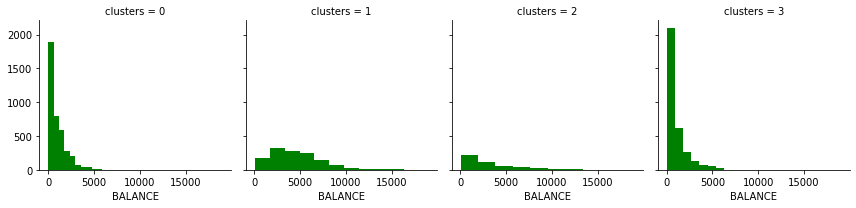

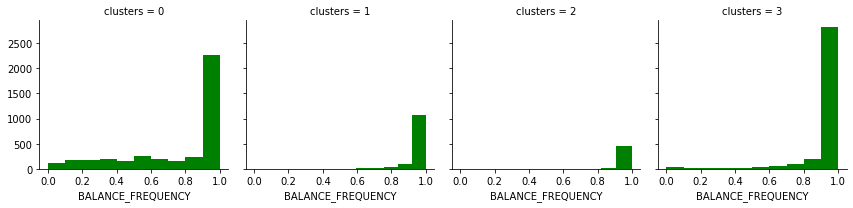

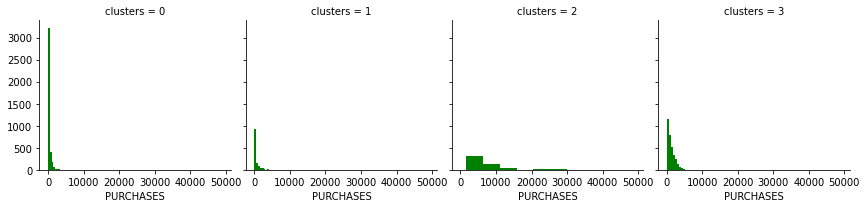

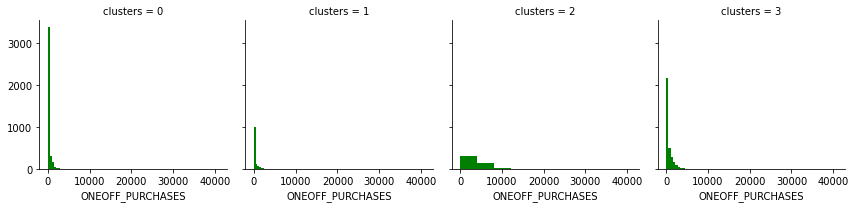

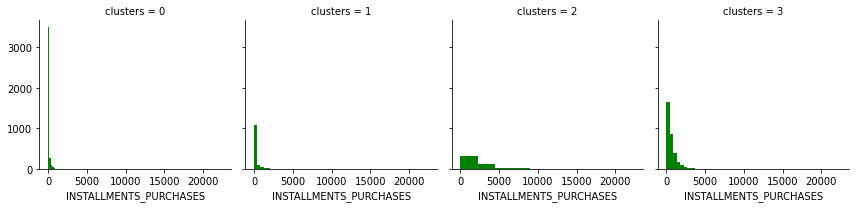

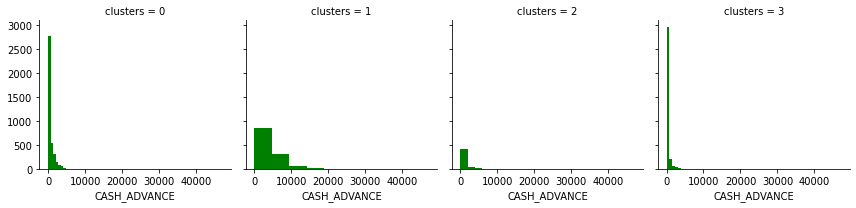

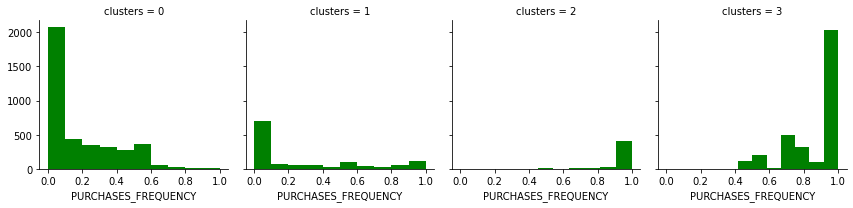

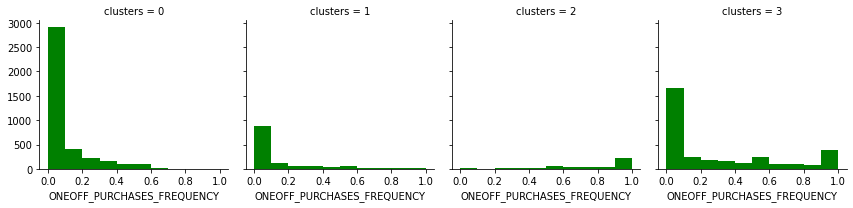

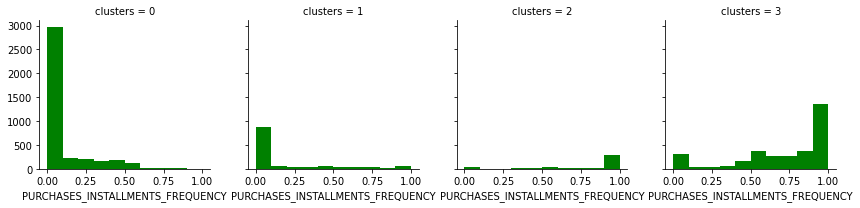

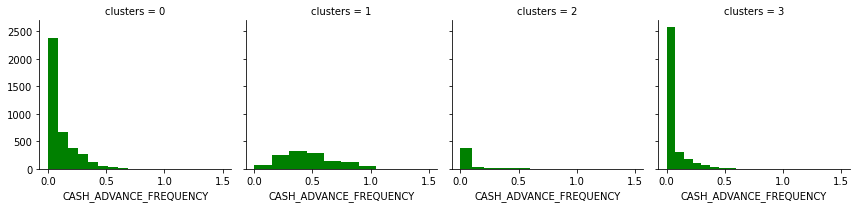

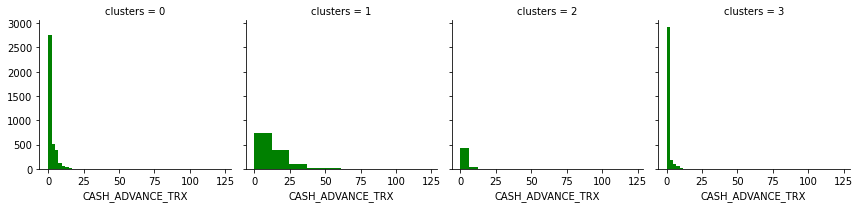

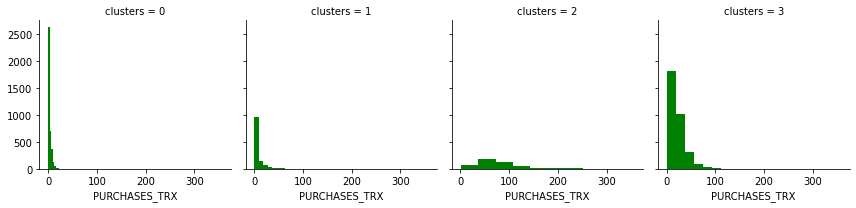

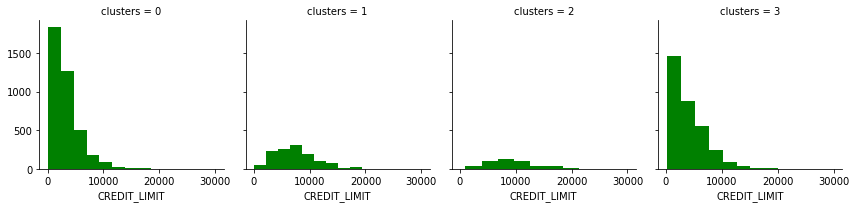

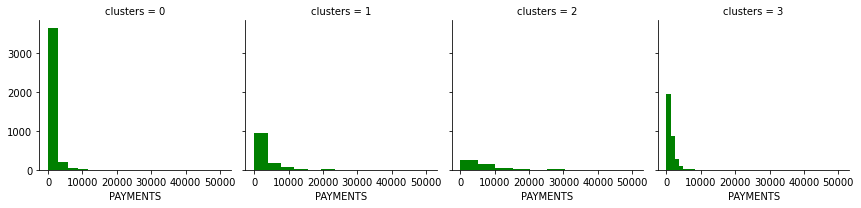

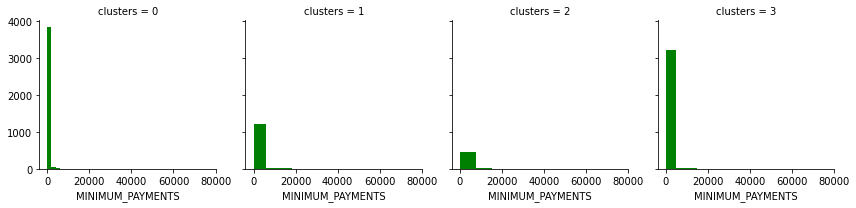

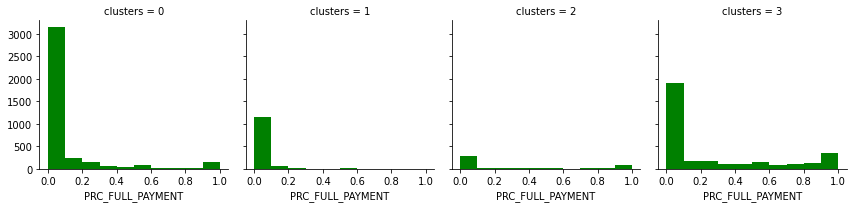

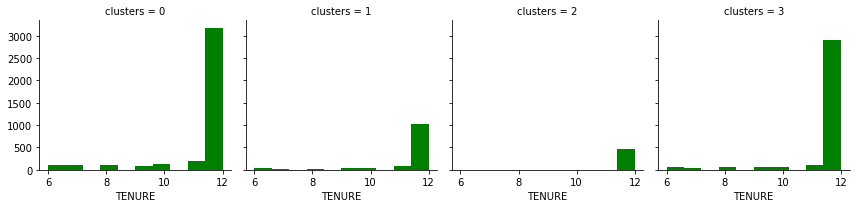

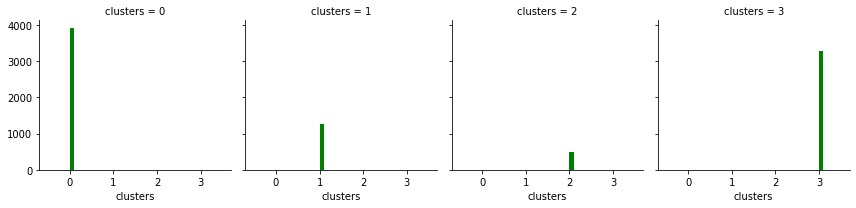

In [53]:
for i in df: 
    a = sns.FacetGrid(df, col='clusters')
    a.map(plt.hist, i, color='green')